# Advanced Chemical Bonding with R in CoCalc - Chapter 3

## Bond Energy and Molecular Stability

This notebook contains Chapter 3 from the main Advanced Chemical Bonding with R in CoCalc notebook.

For the complete course, please refer to the main notebook: `Advanced Chemical Bonding with R in CoCalc.ipynb`


In [0]:
# Setup: Load essential R packages for chemical analysis

# Avoid interactive CRAN prompts
options(repos = c(CRAN = "https://cloud.r-project.org"))

required_packages <- c("ggplot2", "dplyr", "plotly", "corrplot", "reshape2", "RColorBrewer")

# Install missing packages quietly
missing <- required_packages[!vapply(required_packages, requireNamespace, logical(1), quietly = TRUE)]
if (length(missing)) install.packages(missing, quiet = TRUE)

# Attach packages without printing list results or masking chatter
suppressPackageStartupMessages({
  for (pkg in required_packages) {
    suppressWarnings(library(pkg, character.only = TRUE, quietly = TRUE, warn.conflicts = FALSE))
  }
})
# Alternatively:
# invisible(lapply(required_packages, function(pkg)
#   suppressWarnings(library(pkg, character.only = TRUE, quietly = TRUE, warn.conflicts = FALSE))
# ))

# Theme fix: use linewidth instead of size to avoid ggplot2 deprecation warning
chemistry_theme <- ggplot2::theme_minimal() +
  ggplot2::theme(
    plot.title = ggplot2::element_text(size = 16, face = "bold", color = "#2E86AB"),
    plot.subtitle = ggplot2::element_text(size = 12, color = "#A23B72"),
    axis.title = ggplot2::element_text(size = 12, face = "bold"),
    axis.text = ggplot2::element_text(size = 10),
    legend.title = ggplot2::element_text(size = 11, face = "bold"),
    panel.grid.minor = ggplot2::element_blank(),
    panel.border = ggplot2::element_rect(color = "gray80", fill = NA, linewidth = 0.5)
  )

cat("Chemical Analysis Toolkit Loaded Successfully!\n")
cat("Ready to explore the molecular world with R\n")

# Chapter 3: Bond Energy and Molecular Stability

## 3.1 Bond Energy Fundamentals

**Bond energy** (or bond dissociation energy) is the energy required to break one mole of bonds in the gas phase:

A-B(g) → A(g) + B(g) ΔH = Bond Energy

## 3.2 Trends in Bond Energy

1. **Bond Order**: Triple > Double > Single bonds
2. **Atomic Size**: Smaller atoms form stronger bonds
3. **Electronegativity**: Moderate differences optimize bond strength
4. **Hybridization**: sp > sp² > sp³ bond strength

## 3.3 Bond Length-Energy Relationship

**Morse Potential**: E(r) = De[1 - e^(-a(r-re))]²

Where:
- De = dissociation energy
- re = equilibrium bond length
- a = controls curve steepness


📈 Bond Length - Energy Correlation: -0.393


📈 Bond Order - Energy Correlation: 0.936



 Strong negative correlation confirms quantum mechanical predictions!



Bond Order Analysis:


# A tibble: 3 × 4
  bond_order avg_energy avg_length count
       <dbl>      <dbl>      <dbl> <int>
1          1       345.       129.     9
2          2       617.       126      4
3          3       936.       115      4


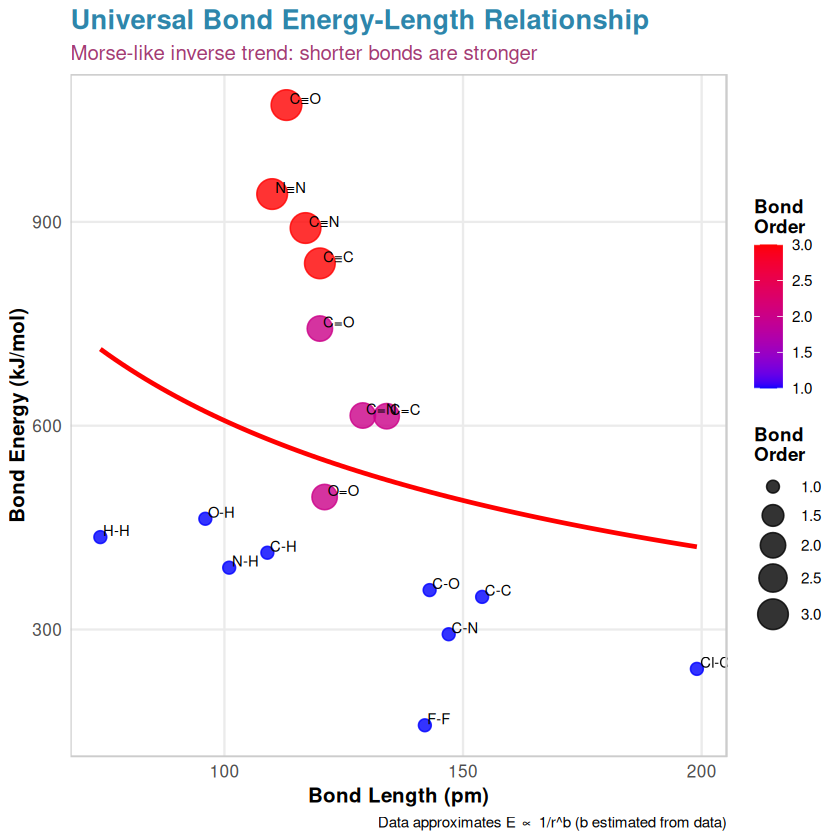

In [7]:
# Comprehensive bond energy and length database
bond_properties <- data.frame(
  bond_type = c("H-H", "C-C", "C=C", "C≡C", "C-H", "C-O", "C=O", "C≡O", 
                "O-H", "N-H", "C-N", "C=N", "C≡N", "O=O", "N≡N", "F-F", "Cl-Cl"),
  bond_energy = c(436, 348, 614, 839, 413, 358, 743, 1072, 
                  463, 391, 293, 615, 891, 495, 941, 159, 242), # kJ/mol
  bond_length = c(74, 154, 134, 120, 109, 143, 120, 113, 
                  96, 101, 147, 129, 117, 121, 110, 142, 199), # pm
  bond_order = c(1, 1, 2, 3, 1, 1, 2, 3, 
                 1, 1, 1, 2, 3, 2, 3, 1, 1),
  hybridization = c("s-s", "sp3-sp3", "sp2-sp2", "sp-sp", "sp3-s", "sp3-sp3", "sp2-sp3", "sp-sp3",
                    "sp3-s", "sp3-s", "sp3-sp3", "sp2-sp3", "sp-sp3", "sp2-sp2", "sp-sp", "sp3-sp3", "sp3-sp3"),
  common_in = c("H2 gas", "Alkanes", "Alkenes", "Alkynes", "Hydrocarbons", "Alcohols", "Carbonyls", "CO gas",
                "Water", "Amines", "Amines", "Imines", "Nitriles", "O2 gas", "N2 gas", "F2 gas", "Cl2 gas")
)

# Compute robust starts for nls from log-log linearization: log(E) = log(a) - b*log(r)
start_lm <- lm(log(bond_energy) ~ log(bond_length), data = bond_properties)
a0 <- exp(coef(start_lm)[1])
b0 <- -coef(start_lm)[2]

# Advanced bond energy visualization with stable nls fit
p_bond_energy <- ggplot(bond_properties, aes(x = bond_length, y = bond_energy)) +
  geom_point(aes(size = bond_order, color = bond_order), alpha = 0.8) +
  geom_text(aes(label = bond_type), hjust = -0.1, vjust = -0.1, size = 3) +
  geom_smooth(
    inherit.aes = FALSE,
    aes(x = bond_length, y = bond_energy, group = 1),
    method = "nls",
    formula = y ~ a * x^(-b),
    method.args = list(start = list(a = a0, b = b0), control = list(maxiter = 200, warnOnly = TRUE)),
    se = FALSE,
    color = "red"
  ) +
  scale_size_continuous(range = c(3, 8), name = "Bond\nOrder") +
  scale_color_gradient(low = "blue", high = "red", name = "Bond\nOrder") +
  labs(
    title = "Universal Bond Energy-Length Relationship",
    subtitle = "Morse-like inverse trend: shorter bonds are stronger",
    x = "Bond Length (pm)",
    y = "Bond Energy (kJ/mol)",
    caption = "Data approximates E ∝ 1/r^b (b estimated from data)"
  ) +
  chemistry_theme

print(p_bond_energy)

# Calculate key correlations
correlation_length_energy <- cor(bond_properties$bond_length, bond_properties$bond_energy)
correlation_order_energy <- cor(bond_properties$bond_order, bond_properties$bond_energy)

cat(sprintf("\n Bond Length - Energy Correlation: %.3f\n", correlation_length_energy))
cat(sprintf(" Bond Order - Energy Correlation: %.3f\n", correlation_order_energy))
cat("\n Strong negative correlation confirms quantum mechanical predictions!\n")

# Create bond order analysis
bond_order_stats <- bond_properties %>%
  group_by(bond_order) %>%
  summarise(
    avg_energy = mean(bond_energy),
    avg_length = mean(bond_length),
    count = n(),
    .groups = 'drop'
  )

cat("\nBond Order Analysis:\n")
print(bond_order_stats)

### From Bond Energy and Molecular Stability to VSEPR Theory and Molecular Geometry

We’ve explored **bond energy** and **molecular stability**, gaining insights into how these fundamental concepts govern molecular interactions and chemical behavior.

But how do these principles extend to **VSEPR theory** and **molecular geometry**?  
In Chapter 4, you'll see how the ideas we’ve covered underpin our understanding of three-dimensional molecular shapes and real-world chemical properties.

---

### Journey Forward

The move from Chapter 3 to Chapter 4 is a natural progression in your chemical education. The foundational knowledge gained here will illuminate the advanced concepts ahead.

- **[Continue to Chapter 4: VSEPR Theory and Molecular Geometry →](https://cocalc.com/share/public_paths/003c3aee2d013b2672b053c908b1d0dba06f9aef)**
- *or*  
- **[Return to Main Notebook](https://cocalc.com/share/public_paths/7dd5489d3b71bd4cdad4b0074ebe4d5e839426d2)**

---

